In [88]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import glob

import cv2


In [104]:
def PCA(data, k):       
    mean = data.mean(axis = 0)

    std_data = data - mean

    cov_mat = np.cov(std_data.T)

    eigen_values, eigen_vectors = np.linalg.eigh(cov_mat)

    ind = np.argsort(-np.abs(eigen_values))
    sel_ind = ind[:k]
    E = eigen_vectors[sel_ind]
    E = E/np.sqrt((np.linalg.norm(E, ord = 2, axis=0)))
    data_r = np.dot(std_data, E.T)
    data_rec = np.dot(data_r, E) + mean
    
    return eigen_values, data, data_r, data_rec, E

In [105]:
data = []
path = 'Path to the data'
for img in glob.glob(path):
    n= cv2.imread(img, cv2.IMREAD_GRAYSCALE)
    data.append(n)
data = np.array(data)
data = np.reshape(data, (data.shape[0], -1))

In [106]:
ev1, data1, data_r1, data_rec1, E1 = PCA(data, 10*10)
ev2, data2, data_r2, data_rec2, E2 = PCA(data, 20*20)
ev3, data3, data_r3, data_rec3, E = PCA(data, 28*28)

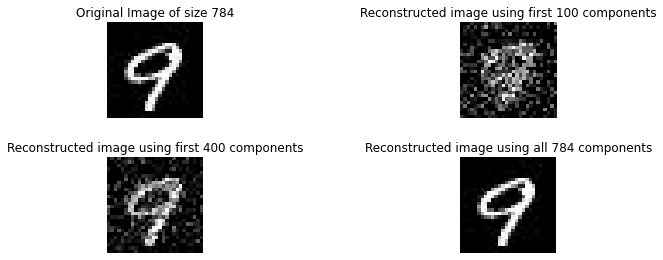

In [112]:
plt.subplot(2, 2, 1) 
plt.imshow(data[3].reshape(28,28), cmap='gray')  
plt.axis('off')  
plt.title("Original Image of size 784")

plt.subplot(2, 2, 2)
plt.imshow(np.clip(data_rec1[3], 0, 255).reshape(28,28), cmap='gray')  
plt.axis('off')  
plt.title("Reconstructed image using first 100 components") 

plt.subplot(2, 2, 3)
plt.imshow(np.clip(data_rec2[3], 0, 255).reshape(28,28), cmap='gray')  
plt.axis('off')  
plt.title("Reconstructed image using first 400 components") 

plt.subplot(2, 2, 4)
plt.imshow(np.clip(data_rec3[3], 0, 255).reshape(28,28), cmap='gray')  
plt.axis('off')  
plt.title("Reconstructed image using all 784 components") 

# set the spacing between subplots
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=1.5, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
plt.show()